In this notebook,
- fits to main detector and monitor detector data are performed with the aim of performing a normalization to the performance of the UCN source

In [5]:
# importing functions for analysis
from functions import *

%load_ext autoreload
%autoreload 2

# sometimes needs to be run twice to get good plots
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# loading all main detector data
data_dict, norm_dict = load_all_main(raw_unix_time_flag = True)

# Normalization based on Source Performance

We are looking specifically for evidence of an overall reduction in UCN counts from run to run, which we anticipate as a feature of the PSI UCN source production appratus. This reduction is the physical upshot of frost build-up on the $s_{D_2}$ source solid. Full details are available in the publication: [Solid deuterium surface degradation at ultracold neutron sources, Anghel et al. 2018](https://link.springer.com/article/10.1140%2Fepja%2Fi2018-12594-2). This article can be found in the "documents" directory of this repository.

Here is some potentially relevant information about the detector, from Bernhard Lauss:

>3) Cascade counter<br/>
you can find a short description in the Appendix f the <br/>
Doctoral Thesis of Leonard Goeltl - ETH Theses  Nr.  20350<br/>
you can download it from the <br/>
ETH Zuerich Thesis Data base

>otherwise check the website of the producer<br/>
C-DT Heidelberg.  cdt.com

Since the 85mm Normalization measurement was repeated throughout the experiment, this data will be used for measuring source performance over time.

shot: loss rate = 13.5+/-1.9 neutrons per second
shot: Red. Chi Squared = 199.69548217102687
shot: degrees of freedom = 4
005s: loss rate = 0.241+/-0.008 neutrons per second
005s: Red. Chi Squared = 0.7811820043168043
005s: degrees of freedom = 20
020s: loss rate = 0.121+/-0.005 neutrons per second
020s: Red. Chi Squared = 0.5651861501835905
020s: degrees of freedom = 19
100s: loss rate = 0.00895+/-0.00035 neutrons per second
100s: Red. Chi Squared = 0.07620689080187404
100s: degrees of freedom = 53


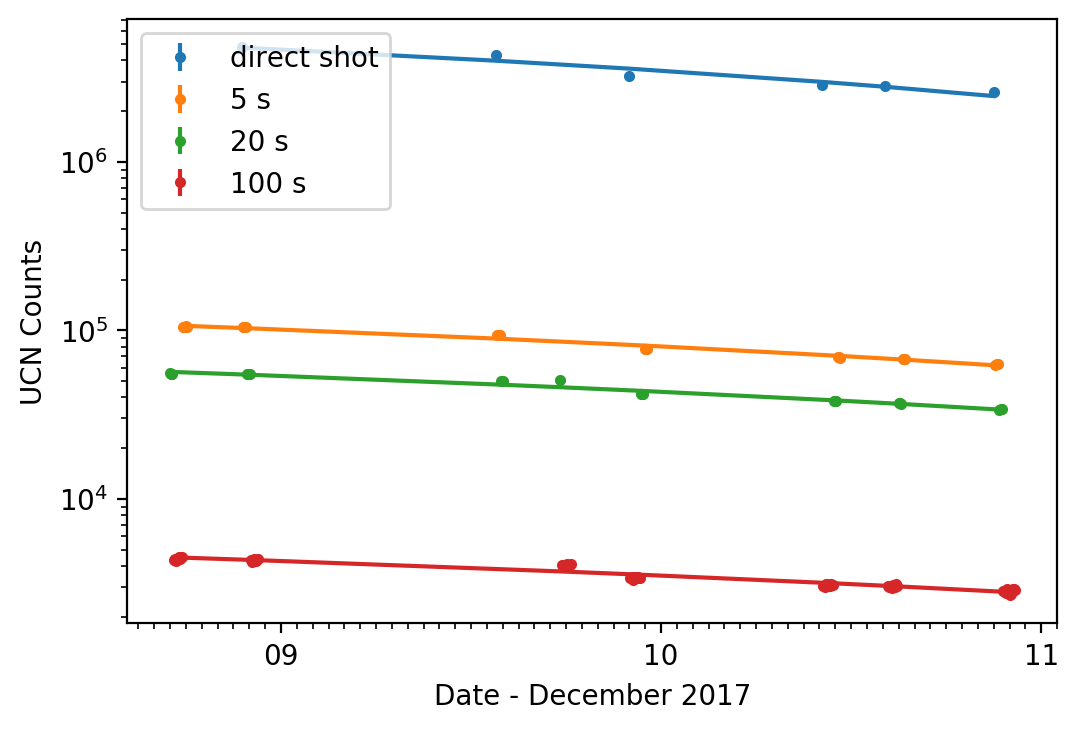

In [9]:
# for an all-in-one figure
fig_a, ax_a = plt.subplots()
ax_a = plt.gca()

# iterate over each run type
for run_type in ['shot', '005s', '020s', '100s']:

    # load the main detector data
    # we use the raw_unix_time_flag here to make a nice plot
    # using actual experimental dates
    arr = load_main('85mm_norm', run_type, raw_unix_time_flag = True)
    
    # for colour consistency in plotting
    color = next(ax_a._get_lines.prop_cycler)['color']
    
    if (run_type == 'shot'):
        plot_label = 'direct shot'
    else:
        plot_label = str(int(run_type[0:3])) + ' s'
        
    x = [dt.datetime.fromtimestamp(d) for d in arr[:,0]]
    y = arr[:,2]
    yerr = arr[:,3]    

    # plotting the data by pre-storage time; all on one figure
    ax_a.errorbar(x, y, yerr = yerr, fmt = '.',
                label = plot_label, color = color)
    
    print(run_type + ': loss rate = {} neutrons per second'.format(norm_dict[run_type, 'y']))
    print(run_type + ': Red. Chi Squared = {}'.format(norm_dict[run_type, 'redchi']))
    print(run_type + ': degrees of freedom = {}'.format(norm_dict[run_type, 'nfree']))
    
    ax_a.plot(x, linear_fit(arr[:,0], 
                       norm_dict[run_type, 'N_0'].nominal_value, 
                       norm_dict[run_type, 'y'].nominal_value), 
              color = color);

# presentation stuff
ax_a.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax_a.xaxis.set_major_locator(mdates.DayLocator())
ax_a.xaxis.set_minor_locator(mdates.HourLocator())
ax_a.set_yscale('log')
ax_a.set_xlabel('Date - December 2017')
# ax_a.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax_a.set_ylabel('UCN Counts');
ax_a.legend();
# ax_a.set_title('TRIUMF-style Normalization');
fig_a.savefig('../img/all_norm.pdf')

# What $\delta \gamma$ would give $\chi^2 / \mathrm{dof} \approx 1$?

!!! It's not yet clear how to approach this, I need to consult with Beatrice.

In [41]:
# initialize dictionary to hold parameter results
norm_dict = {}
run_type_list = ['shot', '005s', '020s', '100s']
# iterate over each run type
for run_type in run_type_list:

    # load the main detector data for the TRIUMF-style normalization
    # configuration
    arr = load_main('85mm_norm', run_type, False)

    ### Using lmfit to perfom fit of source norm data
    t = arr[:, 0]
    counts = arr[:, 2]
    gmodel = Model(linear_fit)
    params = gmodel.make_params(N_0=10000, y=0.24)
    result = gmodel.fit(counts, 
                        params, 
                        t=t, 
                        weights = 1/np.sqrt(arr[:,2]* 19969.548007693822))
    print('\n### ' + run_type + ' ###')
    print('y = {}'.format(ufloat(result.params['y'].value, result.params['y'].stderr)))
    print('redchi = {}'.format(result.redchi))
    print('nfree = {}'.format(result.nfree))


### shot ###
y = 13.5+/-1.9
redchi = 1.0000000000000075
nfree = 4

### 005s ###
y = 0.241+/-0.008
redchi = 0.003911866225977242
nfree = 20

### 020s ###
y = 0.121+/-0.005
redchi = 0.002830240072852267
nfree = 19

### 100s ###
y = 0.00895+/-0.00035
redchi = 0.00038161550151140974
nfree = 53


# Comparing UCN Count Degradation Rates for Different Pre-Storage Times

In the next figure, we look at the decline in relative counts (relative to the first run of that pre-storage time) over the course of the experiment.


### 005s ###
Degrees of Freedom = 20
[[Model]]
    Model(linear_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 22
    # variables        = 2
    chi-square         = 0.01203050
    reduced chi-square = 6.0153e-04
    Akaike info crit   = -161.249756
    Bayesian info crit = -159.067671
[[Variables]]
    N_0:  1.01881550 +/- 0.00902475 (0.89%) (init = 3000)
    y:    2.2920e-06 +/- 7.5798e-08 (3.31%) (init = 2e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(N_0, y) =  0.815


### 020s ###
Degrees of Freedom = 19
[[Model]]
    Model(linear_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 21
    # variables        = 2
    chi-square         = 0.01669155
    reduced chi-square = 8.7850e-04
    Akaike info crit   = -145.884878
    Bayesian info crit = -143.795833
[[Variables]]
    N_0:  1.01786337 +/- 0.01167351 (1.15%) (init = 3000)
    y:    2.1678e-

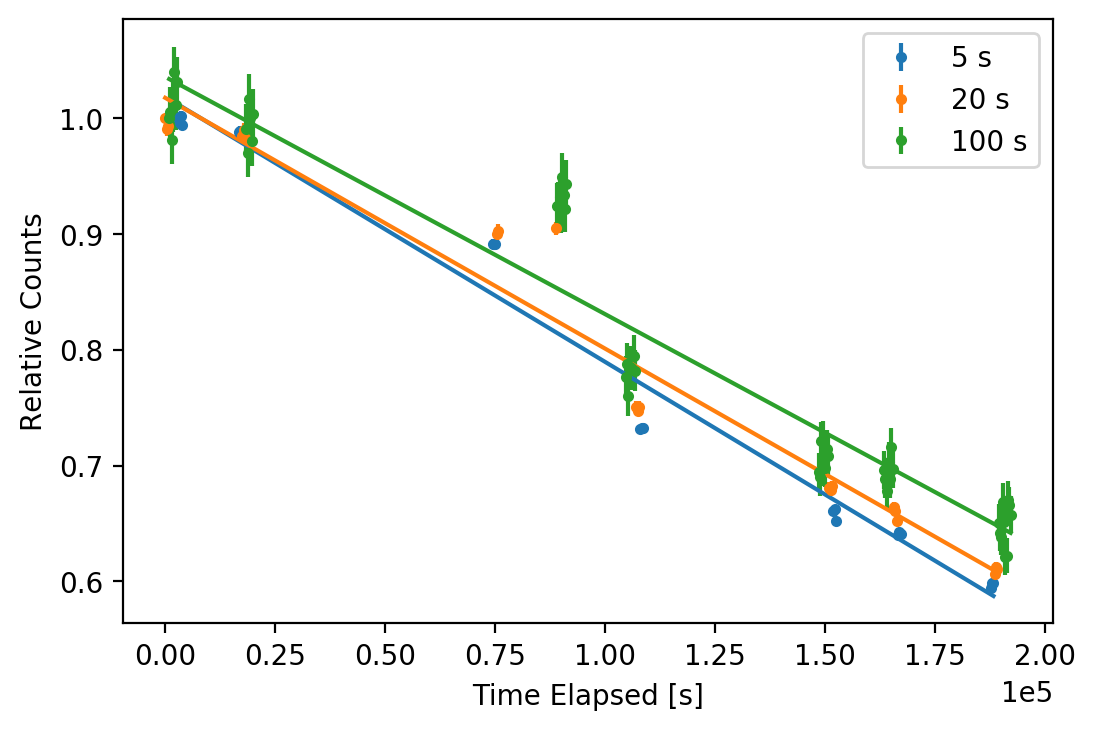

In [14]:
# for a figure plotting the three fits
fig, ax = plt.subplots()
ax = plt.gca()


# iterate over each run type to be normalized. 
# normalizing to the s005 values
# i = 0
for run_type in ['005s', '020s', '100s']:
    
    # This gets an array of the run data where every count
    # value is a fraction representing the count relative to the starting value
    # This also solves the problem because now we don't have to fit at all,
    # or scale
    arr = load_main('85mm_norm', run_type)
    arr = arr[arr[:,0].argsort()]
    uarr = unumpy.umatrix(arr[:,2], arr[:,3])
    uarr = np.divide(uarr, uarr[0,0])
    
    # for colour consistency in plotting
    color = next(ax._get_lines.prop_cycler)['color']

    # update the array values, and hence the dictionary by mutablity in python
    arr[:,2] = unumpy.nominal_values(uarr)
    arr[:,3] = unumpy.std_devs(uarr)

    # plotting the data and fit by pre-storage time; separate figures
    ax.errorbar(arr[:,0], 
                arr[:,2], 
                yerr = arr[:,3], 
                fmt = '.',
                label = str(int(run_type[0:3])) + ' s', 
                color = color)
    
    t     = arr[:,0]
    c     = arr[:,2]
    c_err = arr[:,3]
    gmodel = Model(linear_fit)
    result = gmodel.fit(c, t=t, N_0=3000, y=2e-6)
    print('\n### ' + run_type + ' ###')
    print('Degrees of Freedom = {}'.format(result.nfree))
    print(result.fit_report())
    ax.plot(t, result.best_fit, color = color);

# presentation stuff
ax.set_xlabel('Time Elapsed [s]');
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel('Relative Counts');
ax.legend();
fig.savefig('../img/relative_norm.pdf')

This isn't a great fit, but it seems to contradict the findings from the Anghel paper referenced at the start of this notebook. See the report for a proper discussion of this result. In the next figure, these results are plotted alongside fits to the monitor detector data. 

In [ ]:
# monitor detector
monitor_data = load_monitor()


### 005s ###
Degrees of Freedom = 20
[[Model]]
    Model(linear_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 22
    # variables        = 2
    chi-square         = 0.01203050
    reduced chi-square = 6.0153e-04
    Akaike info crit   = -161.249756
    Bayesian info crit = -159.067671
[[Variables]]
    N_0:  1.26614974 +/- 0.01639154 (1.29%) (init = 3000)
    y:    2.2920e-06 +/- 7.5798e-08 (3.31%) (init = 2e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(N_0, y) =  0.948


### 020s ###
Degrees of Freedom = 19
[[Model]]
    Model(linear_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 21
    # variables        = 2
    chi-square         = 0.01669155
    reduced chi-square = 8.7850e-04
    Akaike info crit   = -145.884878
    Bayesian info crit = -143.795833
[[Variables]]
    N_0:  1.25179833 +/- 0.02105201 (1.68%) (init = 3000)
    y:    2.1678e-

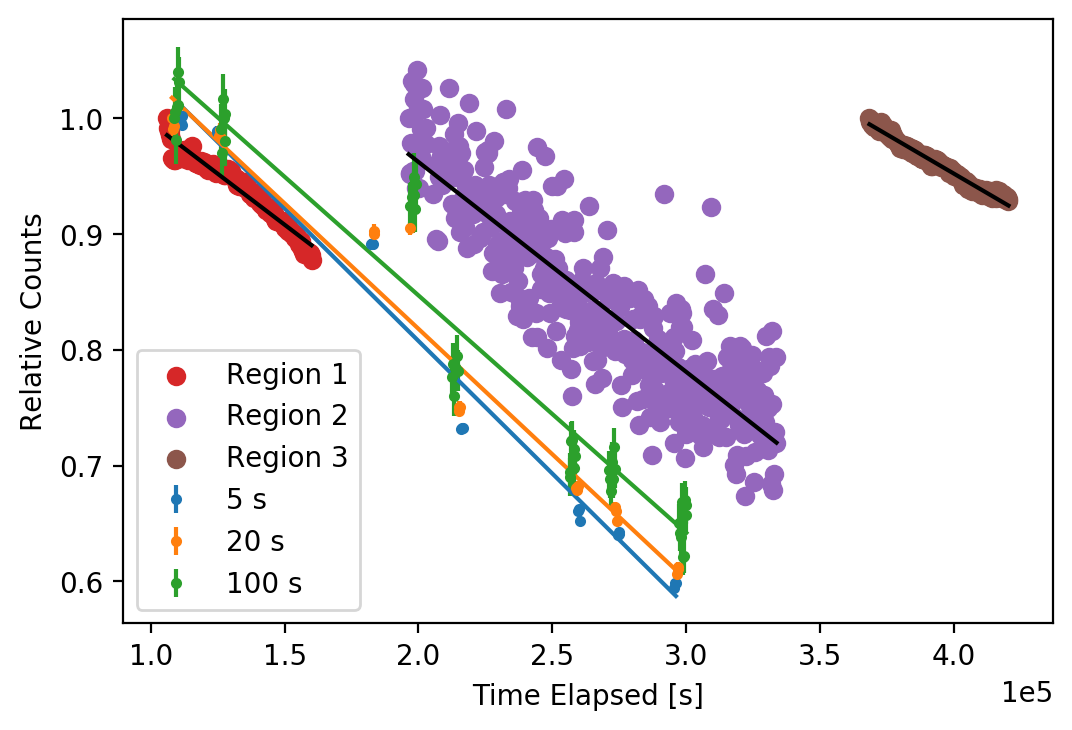

In [17]:
fig, ax = plt.subplots()
ax = plt.gca()

# reset the time to 0
start_time = monitor_data[0,0]

# iterate over each run type to be normalized. 
for run_type in ['005s', '020s', '100s']:
    
    # This gets an array of the run data where every count
    # value is a fraction representing the count relative to the starting value
    # This also solves the problem because now we don't have to fit at all,
    # or scale
    arr = load_main('85mm_norm', run_type)
    arr = arr[arr[:,0].argsort()]
    
    # fix the time stamp here to make the range equivalent to the monitor data
    arr[:,0] = arr[:,0] + get_start_time() - get_monitor_start_time()
    
    uarr = unumpy.umatrix(arr[:,2], arr[:,3])
    uarr = np.divide(uarr, uarr[0,0])
    
    # for colour consistency in plotting
    color = next(ax._get_lines.prop_cycler)['color']

    # update the array values, and hence the dictionary by mutablity in python
    arr[:,2] = unumpy.nominal_values(uarr)
    arr[:,3] = unumpy.std_devs(uarr)

    # plotting the data and fit by pre-storage time; separate figures
    ax.errorbar(arr[:,0], 
                arr[:,2], 
                yerr = arr[:,3], 
                fmt = '.',
                label = str(int(run_type[0:3])) + ' s', 
                color = color)
    
    t     = arr[:,0]
    c     = arr[:,2]
    c_err = arr[:,3]
    gmodel = Model(linear_fit)
    result = gmodel.fit(c, t=t, N_0=3000, y=2e-6)
    print('\n### ' + run_type + ' ###')
    print('Degrees of Freedom = {}'.format(result.nfree))
    print(result.fit_report())
    ax.plot(t, result.best_fit, color = color);

###############################################################################
### MONITOR DATA ###
###############################################################################

# the operations below are essentially the same as the analysis performed in 
# the monitor_detector notebook

arr = monitor_data

start1 = arr[:,1].argmax()
start2 = (np.where(arr[:,1] > 8e5, arr[:,1], 12e5).argmin())
start3 = np.where(arr[:,1] < 8e5, arr[:,1], 0).argmax()
###############################################################################
### REGION 1 ###
###############################################################################
color = next(ax._get_lines.prop_cycler)['color']
t1 = arr[start1:start2, 0]
c1 = arr[start1:start2, 1]

# cutting time range
c1 = c1[t1 > 1.51277e9]
t1 = t1[t1 > 1.51277e9]
c1 = c1[t1 < 1.51284e9]
t1 = t1[t1 < 1.51284e9]

# adjust time
t1 = t1 - start_time

# count range
t1 = t1[c1 > 8e2]
c1 = c1[c1 > 8e2]

# error in counts is sqrt(N) from Poisson
c1_err = np.sqrt(c1)

# making the count (and error) values relative to the t1[0] measurement
reference_measurement = c1[0]
c1 = c1 / reference_measurement
c1_err = c1_err / reference_measurement

# plotting and fitting
# fig1, ax1 = plt.subplots()
# ax.errorbar(t1, c1, yerr = c1_err, fmt='.',  label = 'Region 3', color = color)
ax.scatter(t1, c1, color = color,  label = 'Region 1')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
gmodel = Model(linear_fit)
result = gmodel.fit(c1, t=t1, N_0=6000, y=20, weights = 1/c1_err)
print('\n### Region 1 ###')
print('Degrees of Freedom = {}'.format(result.nfree))
print(result.fit_report())
ax.plot(t1, result.best_fit, color = 'k');

ax.set_ylabel('Relative Counts')
ax.set_xlabel('Unix Epoch Time [s]')
# fig1.savefig('../img/monitor_fit_1.pdf')

###############################################################################
### REGION 2 ###
###############################################################################

color = next(ax._get_lines.prop_cycler)['color']
t2 = arr[start2:start3, 0]
c2 = arr[start2:start3, 1]

# cutting time range
c2 = c2[t2 < 1.513025e9]
t2 = t2[t2 < 1.513025e9]

# adjust time
t2 = t2 - start_time

# count range
t2 = t2[c2 < 8e2]
c2 = c2[c2 < 8e2]
t2 = t2[c2 > 1e2]
c2 = c2[c2 > 1e2]

# error in counts is sqrt(N) from Poisson
c2_err = np.sqrt(c2)

# making the count (and error) values relative to the t1[0] measurement
reference_measurement = c2[0]
c2 = c2 / reference_measurement
c2_err = c2_err / reference_measurement

# plotting and fitting
# fig2, ax2 = plt.subplots()
# ax.errorbar(t2, c2, yerr = c2_err, fmt='.', label = 'Region 2',  color = color)
ax.scatter(t2, c2, color = color,  label = 'Region 2')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
gmodel = Model(linear_fit)
result = gmodel.fit(c2, t=t2, N_0=6000, y=20, weights = 1/c2_err)
print('\n### Region 2 ###')
print('Degrees of Freedom = {}'.format(result.nfree))
print(result.fit_report())
ax.plot(t2, result.best_fit, color = 'k');

ax.set_ylabel('Relative Counts')
ax.set_xlabel('Unix Epoch Time [s]')
# fig2.savefig('../img/monitor_fit_2.pdf')

###############################################################################
### REGION 3 ###
###############################################################################

color = next(ax._get_lines.prop_cycler)['color']
t3 = arr[start3:-1, 0]
c3 = arr[start3:-1, 1]

# adjust time
t3 = t3 - start_time

# error in counts is sqrt(N) from Poisson
c3_err = np.sqrt(c3)

# making the count (and error) values relative to the t1[0] measurement
reference_measurement = c3[0]
c3 = c3 / reference_measurement
c3_err = c3_err / reference_measurement

# plotting and fitting
# fig3, ax3 = plt.subplots()
# ax.errorbar(t3, c3, yerr = c3_err, fmt='.', label = 'Region 3', color = color)
ax.scatter(t3, c3, color = color,  label = 'Region 3')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
gmodel = Model(linear_fit)
result = gmodel.fit(c3, t=t3, N_0=6000, y=20, weights = 1/c3_err)
print('\n### Region 3 ###')
print('Degrees of Freedom = {}'.format(result.nfree))
print(result.fit_report())
ax.plot(t3, result.best_fit, color = 'k');
ax.set_ylabel('Relative Counts')
ax.set_xlabel('Unix Epoch Time [s]')
# fig3.savefig('../img/monitor_fit_3.pdf')

###############################################################################
### FINAL PLOTTING AESTHETICS ###
###############################################################################

# presentation stuff
ax.set_xlabel('Time Elapsed [s]');
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel('Relative Counts');
ax.legend();
fig.savefig('../img/relative_main_and_monitor.pdf')

Here the three 'Regions" of data are from the Monitor Detector data (more on why there are three regions in that notebook). The fit results show that this result is consistent with Anghel's result for comparing monitor v. main detector data. See the report for an extended discussion.